Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## Assignment 5 - Grid Class and Shishkin Grid
The aim of this assignment is to combine the Grid generation algorithms from the last assignment with the advantages of object oriented programming. 

Further more we want wo discusse the freedom of finite element grids on the example of the shishkin grid. 

### 5.1 The Grid Object

Write a python class ```Grid``` where the constructor has the following input. 

<b>INPUT:</b> ```xlow,xhigh,ylow,yhigh ``` - the domain boundaries; ```Nx,Ny ``` - the number of points in each direction <br>

The contructor should store the input variables by the same name ```self.xlow, ...```. The points and the cells of the grid should be created by the class contructor automatically and stored as properties ```self.points``` and ```self.cells```. Consider such that the cells array has to be an array of integers. More precisely ```np.int64```. <br>

Hint: We proviede public properties for this class. Please, do not initial thoose private. 

#### Visualizing 
Add a funktion ```show()``` that visulizes the points and the edges as in 4.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# YOUR CODE HERE
plt.rcParams["figure.figsize"] = [16, 16] # Seting size

def createTriGrid(xlow, xhigh, ylow, yhigh, Nx, Ny):
    '''
    createTriGrid generates a triangular grid for the domain  Ω=[𝑎,𝑏]x[c,d] with Nx and Ny grid-points in each direction.
    
    𝑎, 𝑏, c, d - domain boundaries,  
    𝑁x, Ny  - number of grid-points per direction
    '''   
    
    x = np.linspace(xlow, xhigh, Nx) # 1D of the equidistant grid
    y = np.linspace(ylow, yhigh, Ny) # 1D of the equidistant grid
    
    # Points
    points = np.zeros([Nx*Ny,2])
    points[:,0] = np.kron(np.ones(Ny), x)
    points[:,1] = np.kron(y, np.ones(Nx))
    
    # Cells
    cells = np.zeros([2*(Nx-1)*(Ny-1), 3], dtype=np.int64)
    cells[0::2] = [0,1,Nx]
    cells[1::2] = [Nx+1, Nx, 1]
    shift = np.arange(0, (Nx-1)*(Ny-1))
    shift = np.kron(shift, np.ones(2))
    cells = cells + shift[:,None] # array[:,None] = [[.....]]
    shift = np.arange(0, Ny-1)
    shift = np.kron(shift, np.ones(2*(Nx-1)))
    cells = cells + shift[:,None]
    cells = cells.astype(int)
    
    return points, cells

class Grid:
    def __init__(self, xlow, xhigh, ylow, yhigh, Nx, Ny):
        self.xlow = xlow
        self.xhigh = xhigh
        self.ylow = ylow
        self.yhigh = yhigh
        self.Nx = Nx
        self.Ny = Ny
        self.points, self.cells = createTriGrid(xlow, xhigh, ylow, yhigh, Nx, Ny)
        print(self.points)
        print(self.cells)
        
    def show(self):
        '''
        showGrid generates a graphical object mesh  Ω=[𝑎,𝑏]x[c,d]  with  𝑁x and Ny  grid-points in each direction.

        points - x,y array of points
        cells - P1, P2 and P3 point of a cell array
        '''
        fig = plt.figure() # creating figure
        ax = fig.add_subplot(111)
        ax.axis('equal')

        ax.scatter(self.points[:,0], self.points[:,1], s=35)
        ax.triplot(self.points[:,0], self.points[:,1], self.cells)

        # numbering points
        annotations_points = np.array([])
        for i in range(self.points[:,0].size):
            annotations_points = np.append(annotations_points, 'P'+str(i))
        for i, label in enumerate(annotations_points):
            ax.annotate(label, (self.points[i,0], self.points[i,1]))

        # numbering elements
        annotations_ele = np.array([])
        for i in range(self.cells[:,0].size):
            annotations_ele = np.append(annotations_ele, 'T'+str(i))
        for i, label in enumerate(annotations_ele):
            p1, p2, p3 = self.points[self.cells[i,0]], self.points[self.cells[i,1]], self.points[self.cells[i,2]]
            ax.annotate(label, ((p1[0]+p2[0]+p3[0])/3, (p1[1]+p2[1]+p3[1])/3))

        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        plt.show() 
        
    

[[0.         0.        ]
 [0.10526316 0.        ]
 [0.21052632 0.        ]
 [0.31578947 0.        ]
 [0.42105263 0.        ]
 [0.52631579 0.        ]
 [0.63157895 0.        ]
 [0.73684211 0.        ]
 [0.84210526 0.        ]
 [0.94736842 0.        ]
 [1.05263158 0.        ]
 [1.15789474 0.        ]
 [1.26315789 0.        ]
 [1.36842105 0.        ]
 [1.47368421 0.        ]
 [1.57894737 0.        ]
 [1.68421053 0.        ]
 [1.78947368 0.        ]
 [1.89473684 0.        ]
 [2.         0.        ]
 [0.         0.11111111]
 [0.10526316 0.11111111]
 [0.21052632 0.11111111]
 [0.31578947 0.11111111]
 [0.42105263 0.11111111]
 [0.52631579 0.11111111]
 [0.63157895 0.11111111]
 [0.73684211 0.11111111]
 [0.84210526 0.11111111]
 [0.94736842 0.11111111]
 [1.05263158 0.11111111]
 [1.15789474 0.11111111]
 [1.26315789 0.11111111]
 [1.36842105 0.11111111]
 [1.47368421 0.11111111]
 [1.57894737 0.11111111]
 [1.68421053 0.11111111]
 [1.78947368 0.11111111]
 [1.89473684 0.11111111]
 [2.         0.11111111]


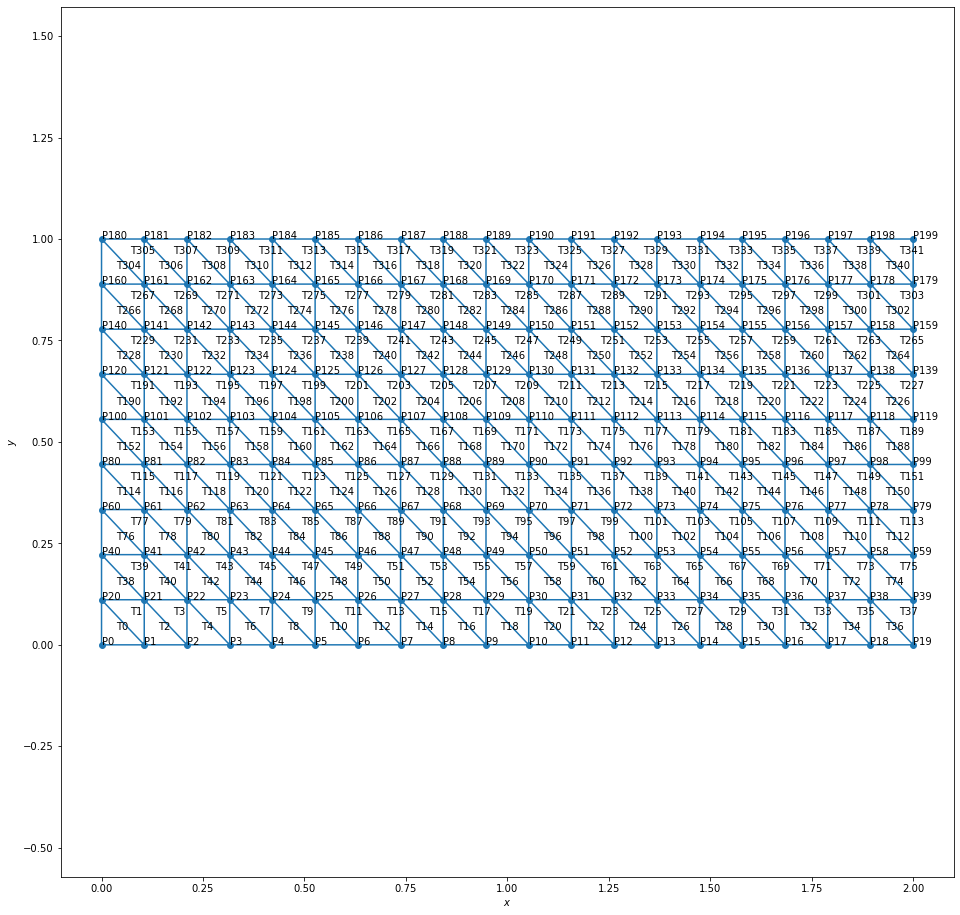

In [2]:
grid = Grid(0,2,0,1,20,10)
grid.show()

### 5.2 - The ShishkinTypeGrid Class

Write a class ```ShishkinTypeGrid``` based on the class ```Grid```. Plaese use the concept of class inheritance. The Shishkin-Type-Grid should be created/transformed in the constructor. 
 
<b>INPUT: </b> ```xlow,xhigh,ylow,yhigh,Nx,Ny ``` and ```ax,ay``` $\in(0,1)$: The level where the domain should be splitted with respect to the axis. 
<br><br>
For Example: ```ShishkinTypeGrid(-1,1,-1,1,0.2,0.5)``` creats a Grid which is rescaled in $x$-direction such that one half of the Gridpoints lie in $[-1,-0.6)\times [-1,1]$ and the other half in $[-0.6,1]\times [-1,1]$.

Hint: In this task we will grading only the Shishkin-Type-Grid with respect to the points and cells. You are not restricted in writing additional helperfunctions.   

#### Error Handling (Optional) 
Check if $ax \in(0,1)$, $ay \in(0,1)$ and raise an error otherwise. 

In [3]:
# YOUR CODE HERE
def ShishkinGridTransform(points, ax=None, ay=None, fx=None, fy=None):
    '''
    ShishkinGridTransform generates a triangular grid for the domain  Ω=[𝑎,𝑏]x[c,d] with Nx and Ny grid-points in each direction.
    Furthermore a grid refinment of type Shishkin is implemented.
    
    points - eqidistant points to be transformed,  
    ax, ay - domain split with respect to axis,
    fx, fy - domain split with respect to axis via functions
    ''' 
    xlow, xhigh = points[0,0], points[-1,0]
    ylow, yhigh = points[0,1], points[-1,1]
    Nx, Ny = len(np.unique(points[:,0])), len(np.unique(points[:,1]))
    
    # Shishkin Grid transform
    if fx!=None and fy!=None:
        x = fx(np.linspace(0, 1, Nx))*(xhigh-xlow)+xlow
        y = fy(np.linspace(0, 1, Ny))*(yhigh-ylow)+ylow
    
    
    # Shiskin-type Grid transform
    else:
        assert 0 < ax < 1, "ax is not in range [0,1]" # Error check
        assert 0 < ay < 1, "ay is not in range [0,1]"
    
        if Nx % 2 == 0: # For even number of points
            x = np.concatenate((
                np.linspace(xlow, xlow+(xhigh-xlow)*ax, Nx, endpoint=True)[0:-1:2], #First half of the points
                np.linspace(xlow+(xhigh-xlow)*ax, xhigh, Nx, endpoint=True)[1::2], # second half of the points
            )) 
        else: # For odd number of points
            x = np.concatenate((
                np.linspace(xlow, xlow+(xhigh-xlow)*ax, Nx//2, endpoint=False), #First half of the points (With one point in middle)
                np.linspace(xlow+(xhigh-xlow)*ax, xhigh, Nx-Nx//2, endpoint=True), #Second half of points
            ))

        if Ny % 2 == 0: 
            y = np.concatenate((
                np.linspace(ylow, ylow+(yhigh-ylow)*ay, Ny, endpoint=True)[0:-1:2],
                np.linspace(ylow+(yhigh-ylow)*ay, yhigh, Ny, endpoint=True)[1::2],
            ))
        else:
            y = np.concatenate((
                np.linspace(ylow, ylow+(yhigh-ylow)*ay, Ny//2, endpoint=False),
                np.linspace(ylow+(yhigh-ylow)*ay, yhigh, Ny-Ny//2, endpoint=True),
            ))
    
    # Points
    points[:,0] = np.kron(np.ones(Ny), x) # Reasign points to Point array
    points[:,1] = np.kron(y, np.ones(Nx))
    
    return points  

class ShishkinTypeGrid(Grid):
    def __init__(self, xlow, xhigh, ylow, yhigh, Nx, Ny, ax=None, ay=None):
        Grid.__init__(self, xlow, xhigh, ylow, yhigh, Nx, Ny)
        self.ax = ax
        self.ay = ay
        self.points = ShishkinGridTransform(self.points, ax, ay)

[[-1.          0.        ]
 [-0.89473684  0.        ]
 [-0.78947368  0.        ]
 [-0.68421053  0.        ]
 [-0.57894737  0.        ]
 [-0.47368421  0.        ]
 [-0.36842105  0.        ]
 [-0.26315789  0.        ]
 [-0.15789474  0.        ]
 [-0.05263158  0.        ]
 [ 0.05263158  0.        ]
 [ 0.15789474  0.        ]
 [ 0.26315789  0.        ]
 [ 0.36842105  0.        ]
 [ 0.47368421  0.        ]
 [ 0.57894737  0.        ]
 [ 0.68421053  0.        ]
 [ 0.78947368  0.        ]
 [ 0.89473684  0.        ]
 [ 1.          0.        ]
 [-1.          0.11111111]
 [-0.89473684  0.11111111]
 [-0.78947368  0.11111111]
 [-0.68421053  0.11111111]
 [-0.57894737  0.11111111]
 [-0.47368421  0.11111111]
 [-0.36842105  0.11111111]
 [-0.26315789  0.11111111]
 [-0.15789474  0.11111111]
 [-0.05263158  0.11111111]
 [ 0.05263158  0.11111111]
 [ 0.15789474  0.11111111]
 [ 0.26315789  0.11111111]
 [ 0.36842105  0.11111111]
 [ 0.47368421  0.11111111]
 [ 0.57894737  0.11111111]
 [ 0.68421053  0.11111111]
 

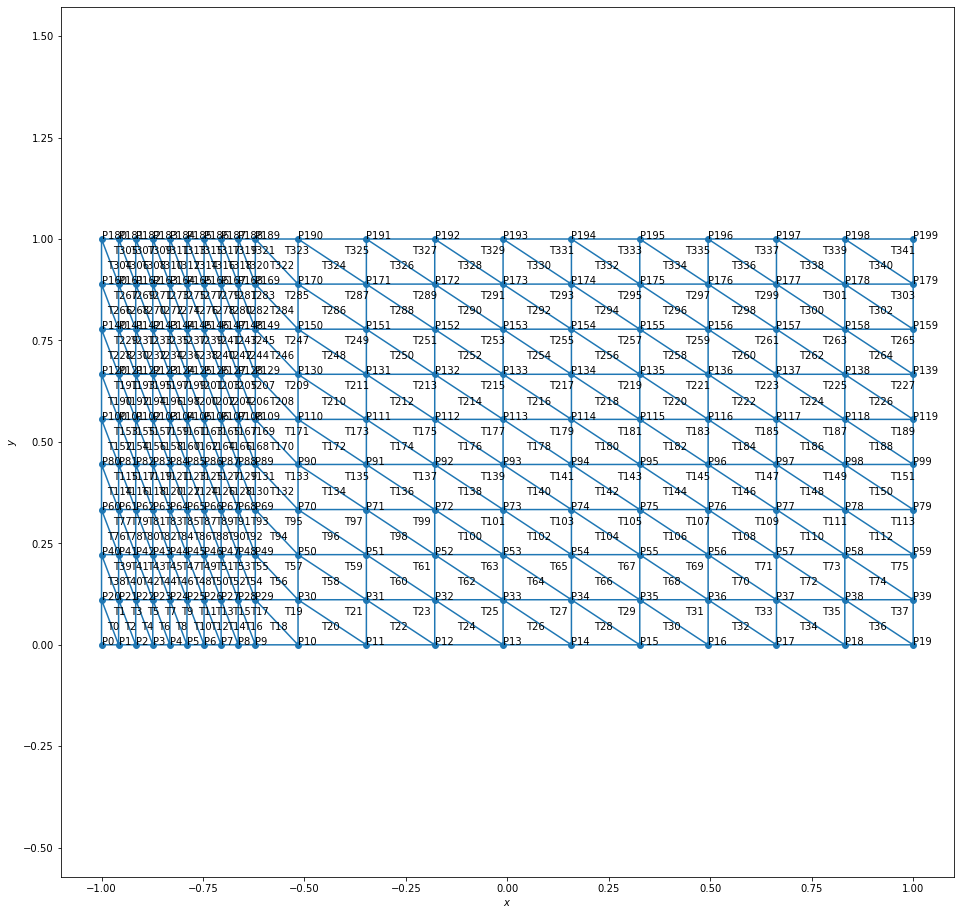

In [4]:
s = ShishkinTypeGrid(-1,1,0,1,20,10,0.2,0.5)
s.show()

### 5.3 - ShishkinGrid (Optional)
Write a class ```ShishkinGrid``` based on ShishkinTypeGrid. 

<b>INPUT: </b> ```xlow,xhigh,ylow,yhigh,Nx,Ny,ax,ay``` and ```fx ,fy``` - transformation functions. The ShishkinGrid should automatically use ```ax,ay``` for initalization iif ```fx,fy``` are setted as ```None```. Otherwise an equidistant Grid should be transformed by the transformation functions in the contructor. You can use here the concept of optional arguments. 

In [9]:
# YOUR CODE HERE
class ShishkinGrid(ShishkinTypeGrid):
    def __init__(self, xlow, xhigh, ylow, yhigh, Nx, Ny, ax=None, ay=None, fx=None, fy=None):
        Grid.__init__(self, xlow, xhigh, ylow, yhigh, Nx, Ny)
        self.ax = ax
        self.ay = ay
        self.fx = fx
        self.fy = fy
        self.points = ShishkinGridTransform(self.points, ax, ay, fx, fy)

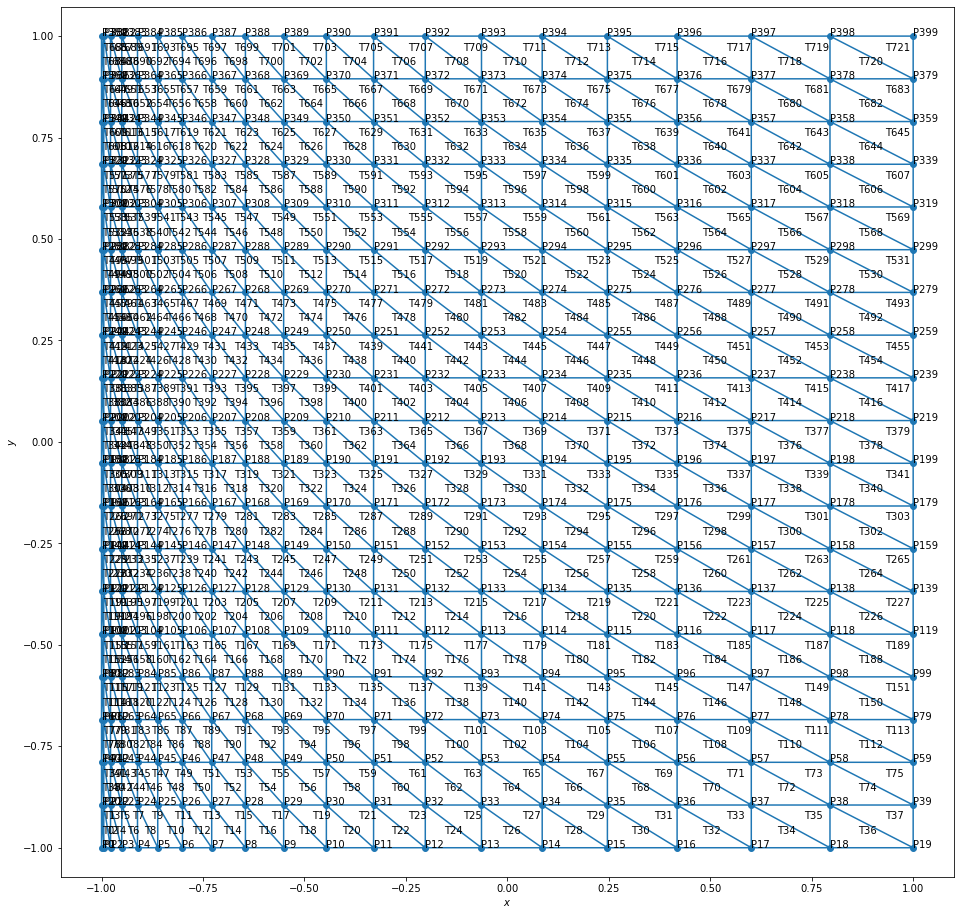

In [10]:
g = ShishkinGrid(-1,1,-1,1,20,20,fx = lambda x:x**2 , fy = lambda x:x)
g.show()